# Define business requirement
#### By Ahmad Alkaseb

**Hypothesis**:  
*States with more relaxed gun ownership regulations experience a higher frequency of school shootings compared to states with stricter gun control policies.*

## Data collection

In [225]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, PolynomialFeatures

In [227]:
# Load the data into a dataframe using pandas library
df = pd.read_csv('Mass shooting data.csv')

## Data cleaning

In [230]:
# Have a look at the dataframe
df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,1978561,"April 15, 2021",District of Columbia,Washington,1800 block of West Virginia Ave NE,0,4,NaN
1,1978635,"April 15, 2021",Indiana,Indianapolis,8951 Mirabel Rd,8,5,NaN
2,1978652,"April 15, 2021",Illinois,Chicago,600 block of N Sawyer Ave,0,4,NaN
3,1978616,"April 15, 2021",Florida,Pensacola,700 Truman Ave,0,6,NaN
4,1976538,"April 13, 2021",Maryland,Baltimore,2300 block of Hoffman St,0,4,NaN
...,...,...,...,...,...,...,...,...
1995,634238,"August 20, 2016",Connecticut,Hamden,903 Dixwell Ave,0,4,NaN
1996,634731,"August 20, 2016",Washington,Tacoma,900 block of Pacific Avenue,0,5,NaN
1997,634819,"August 20, 2016",Alabama,Citronelle,Jim Platt Road,5,0,NaN
1998,632747,"August 18, 2016",Connecticut,Waterbury,402 E Main Street,0,4,NaN


In [232]:
# Let's get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Incident ID     2000 non-null   int64  
 1   Incident Date   2000 non-null   object 
 2   State           2000 non-null   object 
 3   City Or County  2000 non-null   object 
 4   Address         1997 non-null   object 
 5   # Killed        2000 non-null   int64  
 6   # Injured       2000 non-null   int64  
 7   Operations      0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


#### We can conclude that we have three values missing in address, and that we have 0 data in operations (column).
#### We'll drop operations column, and add mode of address column into the three missing values.

In [235]:
# Replacing the address column with the mode
df['Address'] = df['Address'].fillna(df['Address'].mode()[0])

In [237]:
# Deleting the operations column
df = df.drop(['Operations'], axis=1)

In [239]:
# Let's see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Incident ID     2000 non-null   int64 
 1   Incident Date   2000 non-null   object
 2   State           2000 non-null   object
 3   City Or County  2000 non-null   object
 4   Address         2000 non-null   object
 5   # Killed        2000 non-null   int64 
 6   # Injured       2000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 109.5+ KB


#### We can conclude that our has been cleaned and is ready for exploration and analysis.

## Data Exploration & Analysis

In [243]:
# Let's have a look at the data
# df

# Get the first 5 rows
# df.head()

# Get 5 random rows
# df.sample(5)

# Get the last 5 rows
# df.tail()

In [245]:
# Get the names of all the columns
df.columns

Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       '# Killed', '# Injured'],
      dtype='object')

In [247]:
print('Rows: {} Columns: {} Size: {}'.format(df.shape[0], df.shape[1], df.size))

Rows: 2000 Columns: 7 Size: 14000


In [249]:
# Get advanced information about the data
df.describe()

,Incident ID,# Killed,# Injured
count,2.000000e+03,2000.000000,2000.00000
mean,1.372291e+06,1.051000,4.27500
std,3.952735e+05,2.106803,10.00187
min,6.327470e+05,0.000000,0.00000
25%,1.032258e+06,0.000000,3.00000
50%,1.428412e+06,1.000000,4.00000
75%,1.725039e+06,1.000000,5.00000
max,1.978652e+06,59.000000,441.00000


In [251]:
# Selecting our categorical columns
data_column_category = df.select_dtypes(exclude=[np.number]).columns

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Creating an empty tuple to store the mappings
label_mappings = {}

# Apply one-hot encoding to be able to use the data for analysis.
for col in data_column_category:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the name of the state with the encoded value.
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("State Mapping:")

# Print out the states with their encoded value.
for original, encoded in label_mappings['State'].items():
    print(f"{encoded}: {original}")

State Mapping:
0: Alabama
1: Alaska
2: Arizona
3: Arkansas
4: California
5: Colorado
6: Connecticut
7: Delaware
8: District of Columbia
9: Florida
10: Georgia
11: Idaho
12: Illinois
13: Indiana
14: Iowa
15: Kansas
16: Kentucky
17: Louisiana
18: Maine
19: Maryland
20: Massachusetts
21: Michigan
22: Minnesota
23: Mississippi
24: Missouri
25: Montana
26: Nebraska
27: Nevada
28: New Jersey
29: New Mexico
30: New York
31: North Carolina
32: Ohio
33: Oklahoma
34: Oregon
35: Pennsylvania
36: South Carolina
37: South Dakota
38: Tennessee
39: Texas
40: Utah
41: Virginia
42: Washington
43: West Virginia
44: Wisconsin
45: Wyoming


In [253]:
# Let's see how it turned out to be
df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,1978561,16,8,624,460,0,4
1,1978635,16,13,274,1622,8,5
2,1978652,16,12,108,1341,0,4
3,1978616,16,9,453,1456,0,6
4,1976538,11,19,40,649,0,4
...,...,...,...,...,...,...,...
1995,634238,113,6,240,1648,0,4
1996,634731,113,42,578,1640,0,5
1997,634819,113,0,114,1809,5,0
1998,632747,103,6,625,1042,0,4


array([[<Axes: title={'center': 'Incident ID'}>,
        <Axes: title={'center': 'Incident Date'}>,
        <Axes: title={'center': 'State'}>],
       [<Axes: title={'center': 'City Or County'}>,
        <Axes: title={'center': 'Address'}>,
        <Axes: title={'center': '# Killed'}>],
       [<Axes: title={'center': '# Injured'}>, <Axes: >, <Axes: >]],
      dtype=object)

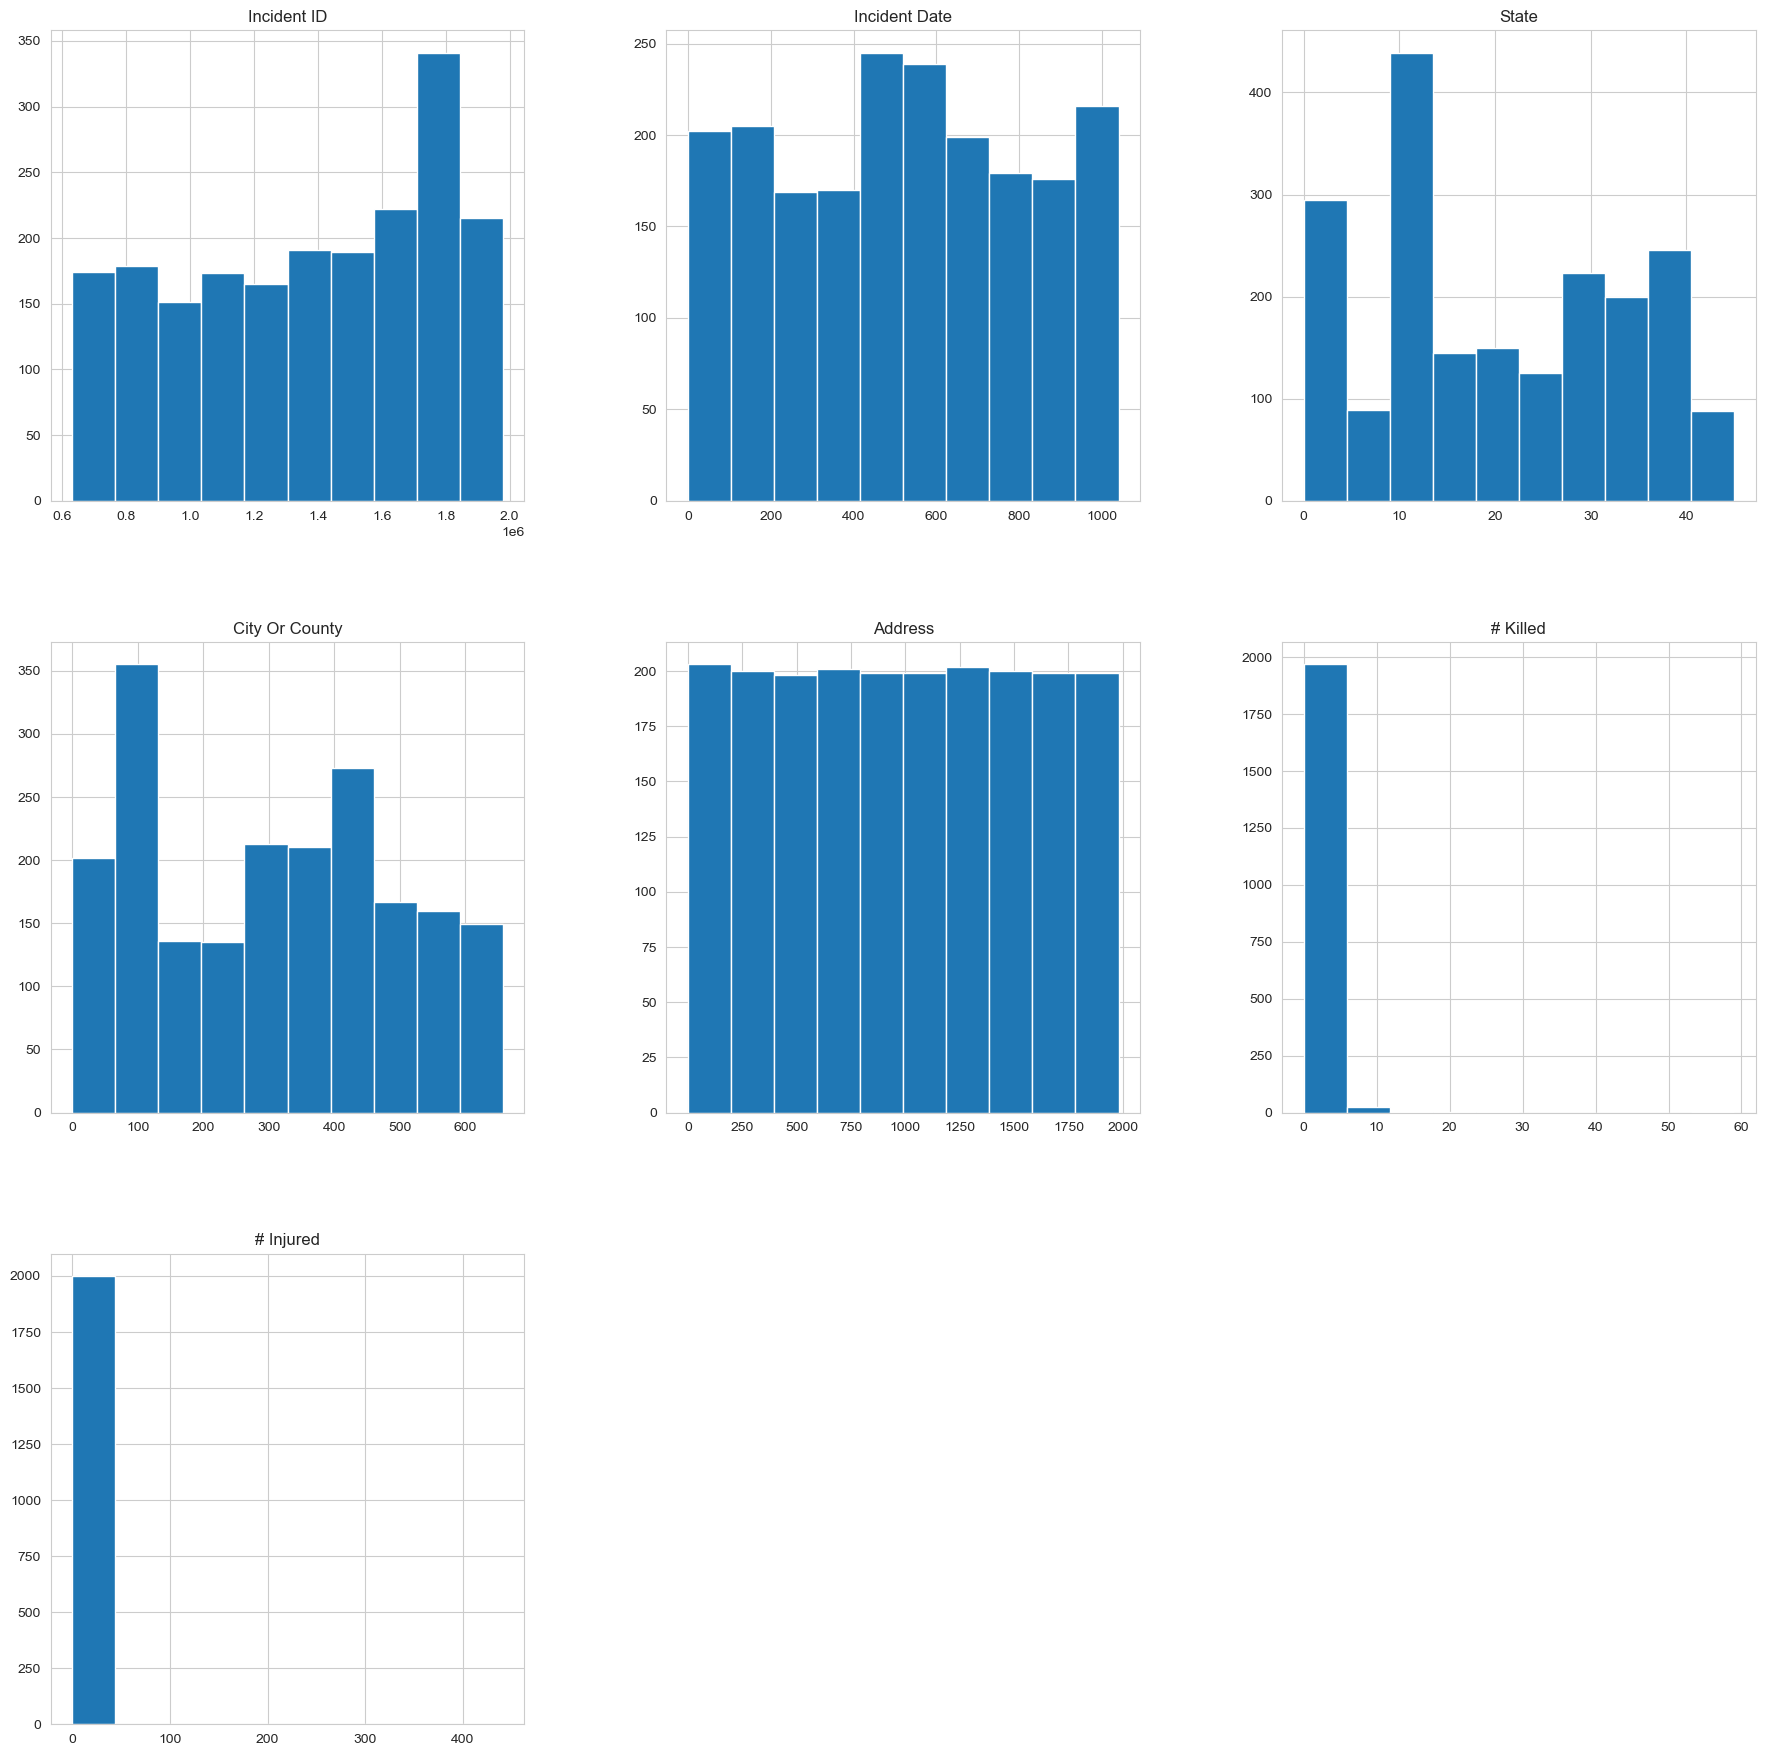

In [255]:
# Let's print out the histograms
df.hist(figsize=(22, 22))

#### We can conclude that none of them are ideally normally distributed

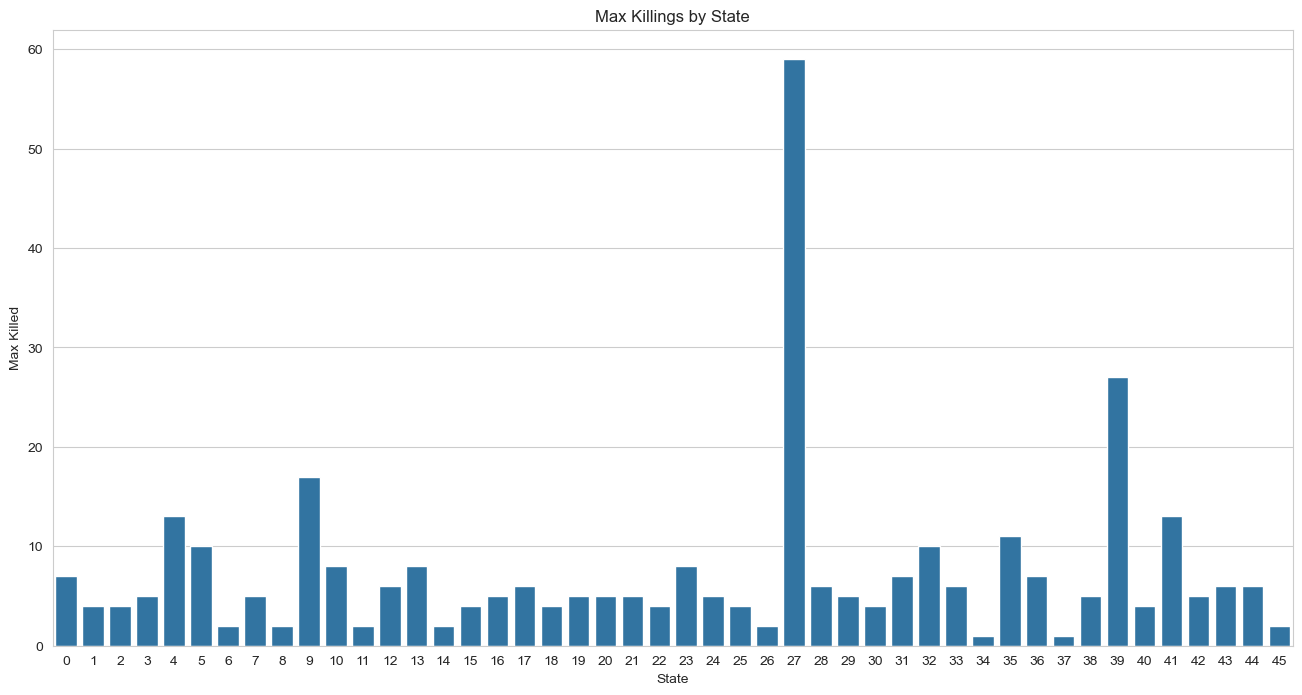

In [257]:
# Grouping by states to get the maximum number of killings for each state
df_grouped = df.groupby('State')['# Killed'].max().reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x='State', y='# Killed', data=df_grouped)
plt.title('Max Killings by State')
plt.xlabel('State')
plt.ylabel('Max Killed')
plt.show()

#### We can conclude that state number 27 (Nevada) has the most killings.

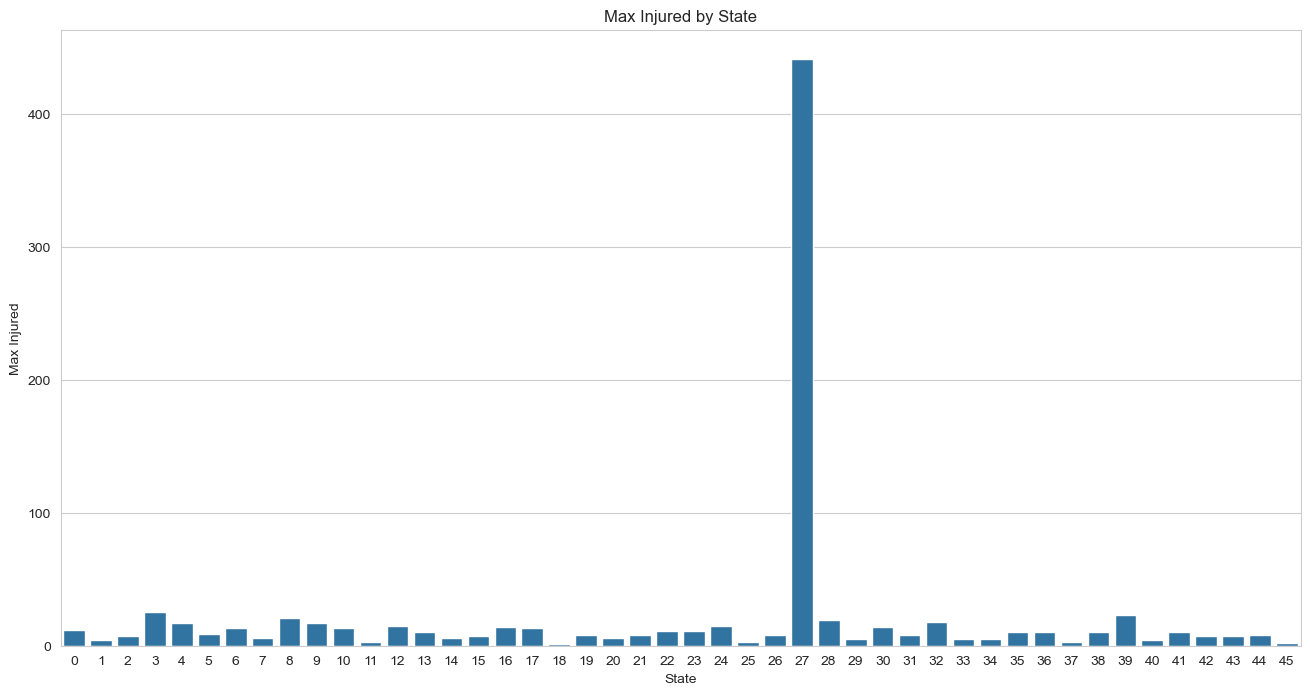

In [259]:
# Grouping by states to get the maximum number of injured for each state
df_grouped = df.groupby('State')['# Injured'].max().reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(x='State', y='# Injured', data=df_grouped)
plt.title('Max Injured by State')
plt.xlabel('State')
plt.ylabel('Max Injured')
plt.show()

#### We can conclude that state number 27 (Nevada) has the most injured.

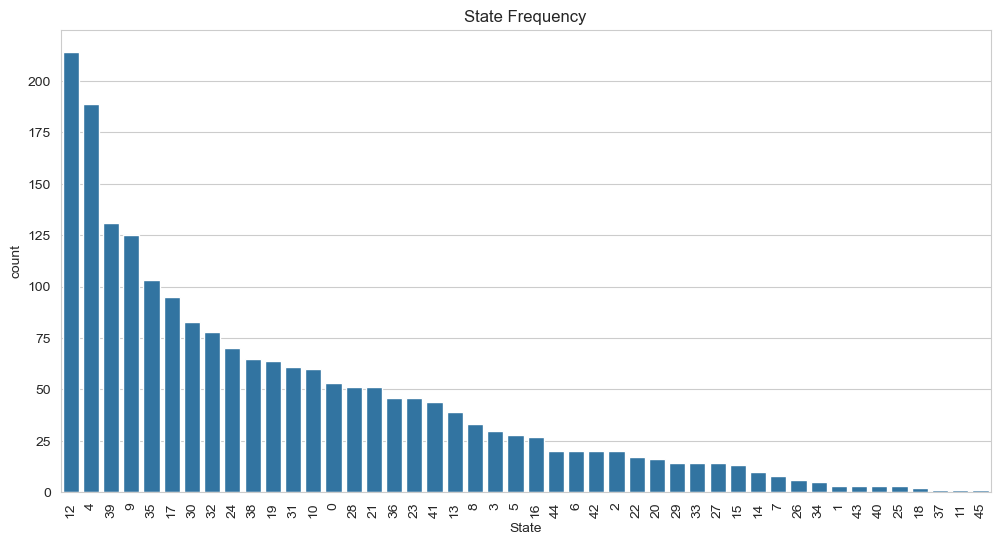

In [262]:
# Displaying the number of school shootings per state
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.title('State Frequency')
plt.xticks(rotation=90)
plt.show()

#### We can conclude that state number 12 (Illinois) has the most shootings.

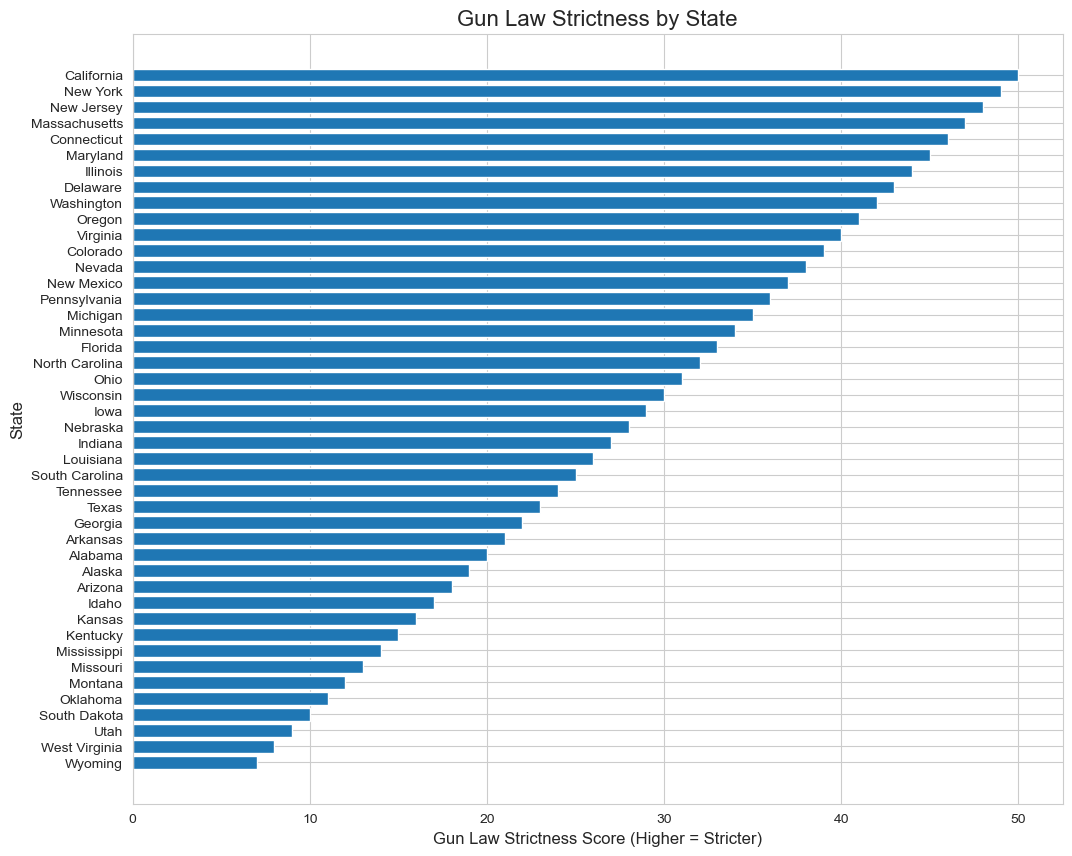

             State  Gun Law Strictness
43         Wyoming                   7
42   West Virginia                   8
41            Utah                   9
40    South Dakota                  10
39        Oklahoma                  11
38         Montana                  12
37        Missouri                  13
36     Mississippi                  14
35        Kentucky                  15
34          Kansas                  16
33           Idaho                  17
32         Arizona                  18
31          Alaska                  19
30         Alabama                  20
29        Arkansas                  21
28         Georgia                  22
27           Texas                  23
26       Tennessee                  24
25  South Carolina                  25
24       Louisiana                  26
23         Indiana                  27
22        Nebraska                  28
21            Iowa                  29
20       Wisconsin                  30
19            Ohio       

In [281]:
# Gun law strictness dictionary by research
gun_law_strictness = {
    'California': 50, 'New York': 49, 'New Jersey': 48, 'Massachusetts': 47, 'Connecticut': 46,
    'Maryland': 45, 'Illinois': 44, 'Delaware': 43, 'Washington': 42, 'Oregon': 41,
    'Virginia': 40, 'Colorado': 39, 'Nevada': 38, 'New Mexico': 37, 'Pennsylvania': 36,
    'Michigan': 35, 'Minnesota': 34, 'Florida': 33, 'North Carolina': 32, 'Ohio': 31,
    'Wisconsin': 30, 'Iowa': 29, 'Nebraska': 28, 'Indiana': 27, 'Louisiana': 26,
    'South Carolina': 25, 'Tennessee': 24, 'Texas': 23, 'Georgia': 22, 'Arkansas': 21,
    'Alabama': 20, 'Alaska': 19, 'Arizona': 18, 'Idaho': 17, 'Kansas': 16, 'Kentucky': 15,
    'Mississippi': 14, 'Missouri': 13, 'Montana': 12, 'Oklahoma': 11, 'South Dakota': 10,
    'Utah': 9, 'West Virginia': 8, 'Wyoming': 7
}

# To avoid destroying our data
df_copy = df.copy()

# Create the two needed columns, state and gun law strictness
df_copy = pd.DataFrame(list(gun_law_strictness.items()), columns=['State', 'Gun Law Strictness'])

# Sort the values
df_sorted = df_copy.sort_values('Gun Law Strictness', ascending=True)

# Create a new DataFrame based on the sorted data
df_new = pd.DataFrame({
    'State': df_sorted['State'],
    'Strictness Rank': df_sorted['Gun Law Strictness'].rank(ascending=False).astype(int)
})

fig, ax = plt.subplots(figsize=(12, 10))
bars = ax.barh(df_sorted['State'], df_sorted['Gun Law Strictness'])
ax.set_title('Gun Law Strictness by State', fontsize=16)
ax.set_xlabel('Gun Law Strictness Score (Higher = Stricter)', fontsize=12)
ax.set_ylabel('State', fontsize=12)
plt.show()

print(df_sorted)

#### We can conclude that California is the most strict state and Wyoming is the opposite.

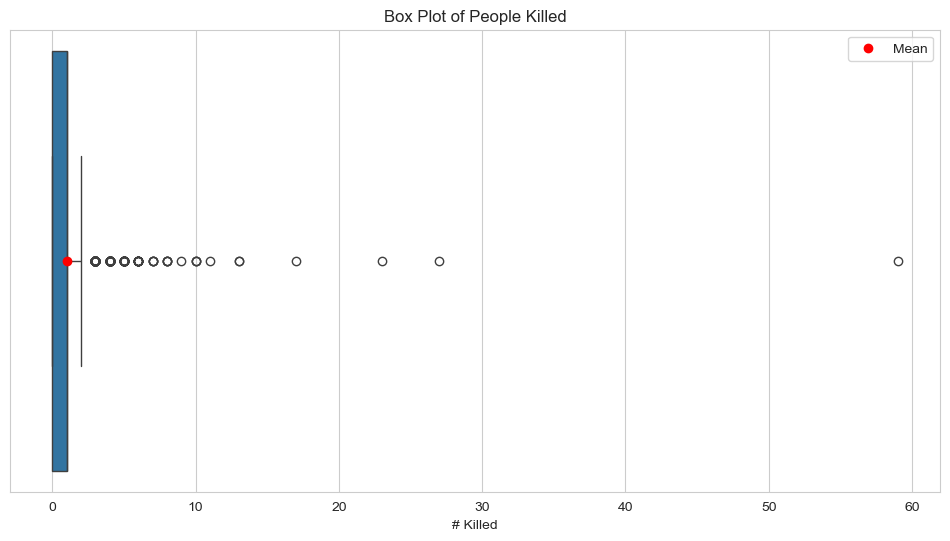

In [214]:
# Box and whiskers plot of the killings in each accident, and showing the mean

plt.figure(figsize=(12, 6))
sns.boxplot(x='# Killed', data=df)
mean_value = df['# Killed'].mean()
plt.scatter(mean_value, 0, color='red', zorder=10, label='Mean')
plt.title('Box Plot of People Killed')
plt.legend()
plt.show()

#### We can conclude that most of the shootings have 0 or 1 killed, and that anything above 2 killed is an outlier.

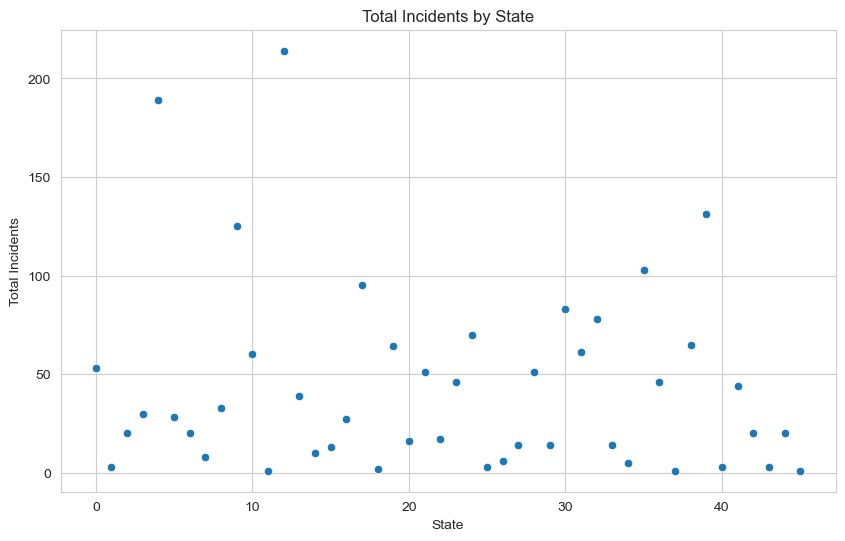

In [50]:
# Grouping by states to get the number of incidents

df_grouped = df.groupby('State')['Incident Date'].count().reset_index(name='Total Incidents')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State', y='Total Incidents', data=df_grouped)
plt.title('Total Incidents by State')
plt.xlabel('State')
plt.ylabel('Total Incidents')
plt.show()

#### We can conclude that state number 12 (Illinois) has the most shootings.

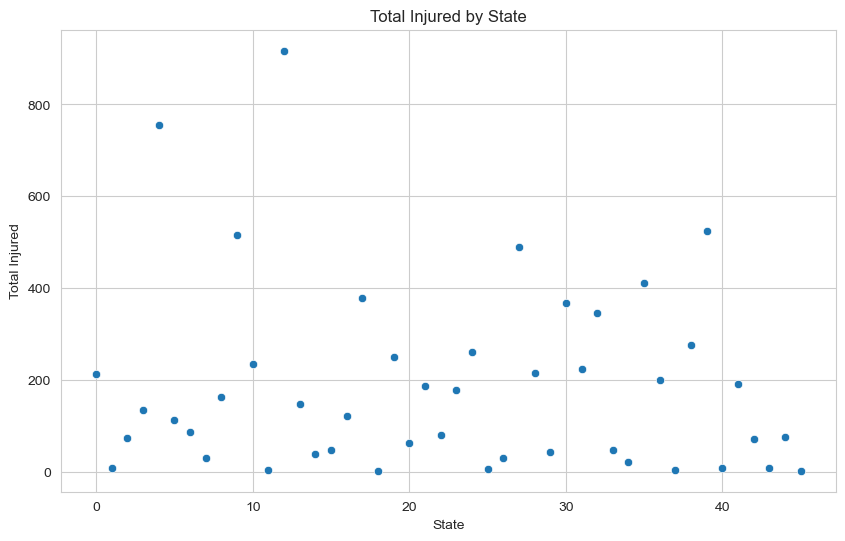

In [54]:
# Grouping by states to get the number of injured

df_grouped = df.groupby('State')['# Injured'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State', y='# Injured', data=df_grouped)
plt.title('Total Injured by State')
plt.xlabel('State')
plt.ylabel('Total Injured')
plt.show()

#### We can conclude that state number 12 (Illinois) has the most injured.

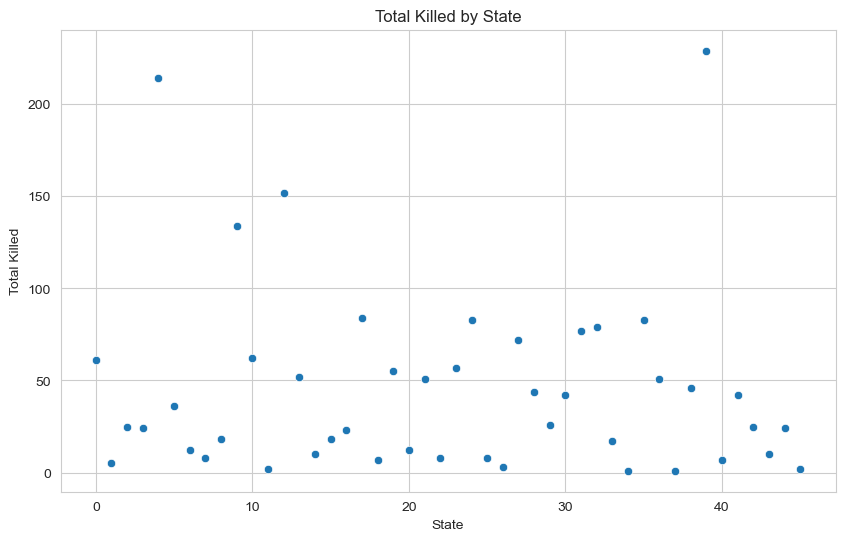

In [56]:
# Grouping by states to get the number of killed

df_grouped = df.groupby('State')['# Killed'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State', y='# Killed', data=df_grouped)
plt.title('Total Killed by State')
plt.xlabel('State')
plt.ylabel('Total Killed')
plt.show()

#### We can conclude that state number 39 (Texas) has the most killed.

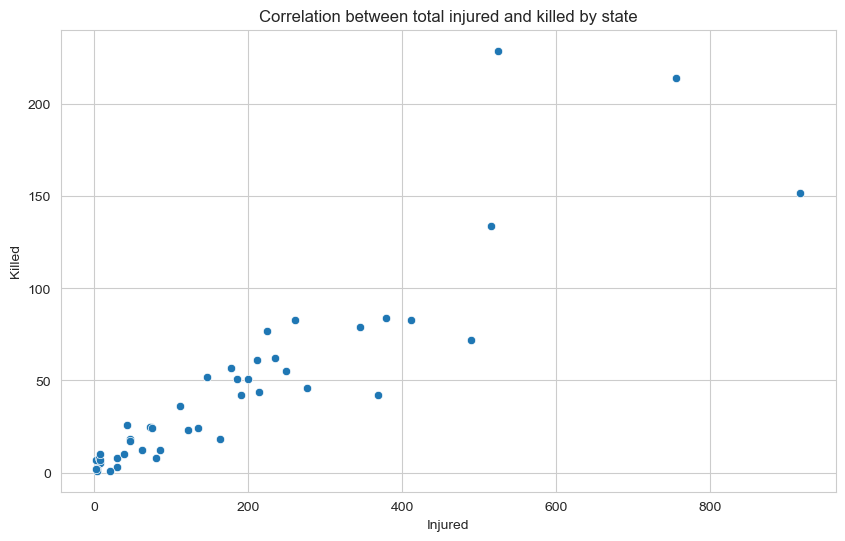

In [62]:
# Grouping by state and summing the 'injured' and 'killed' values

df_injured = df.groupby('State')['# Injured'].sum().reset_index()
df_killed = df.groupby('State')['# Killed'].sum().reset_index()
df_grouped = pd.merge(df_injured, df_killed, on='State')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='# Injured', y='# Killed', data=df_grouped)
plt.title('Correlation between total injured and killed by state')
plt.xlabel('Injured')
plt.ylabel('Killed')
plt.show()

#### We can conclude that the more injured the more is killed.

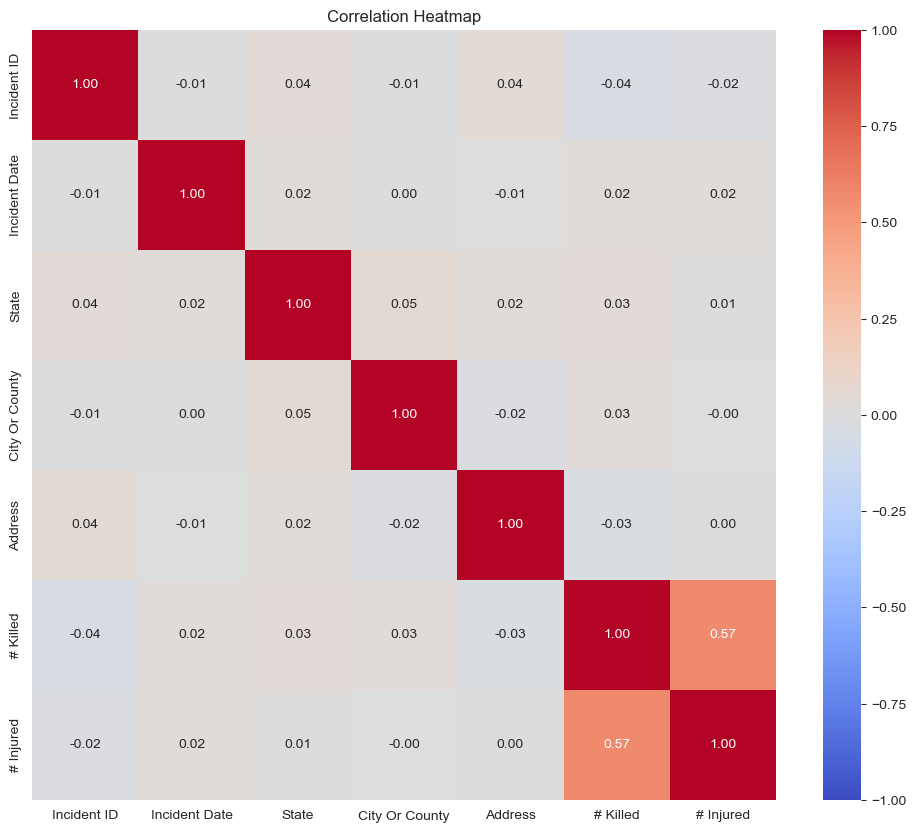

In [64]:
# Showing correlation heatmap of the dataframe

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### We can conclude that there is an high correlation between injured and killed.

# Data modellering

#### Linear Regression

In [75]:
# Shuffling the data
df_shuffled = shuffle(df, random_state=42)

# Creating the Y and X values
DV = '# Killed' 
X = df_grouped[['# Injured']] 
y = df_grouped[DV]

# Our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Creating an instance of LinearRegression
model = LinearRegression()

# Training our model with the given values
model.fit(X_train[['# Injured']], y_train)

# Printing out the folowing:
print('Interception: ', model.intercept_)
print('Coefficient: ', model.coef_)
print('The formula: Killed = {0:0.2f} + ({1:0.2f} x injured)'.format(model.intercept_, model.coef_[0]))

# Testing our model with real values
predictions = model.predict(X_test[['# Injured']])

Interception:  7.620759882065958
Coefficient:  [0.17418829]
The formula: Killed = 7.62 + (0.17 x injured)


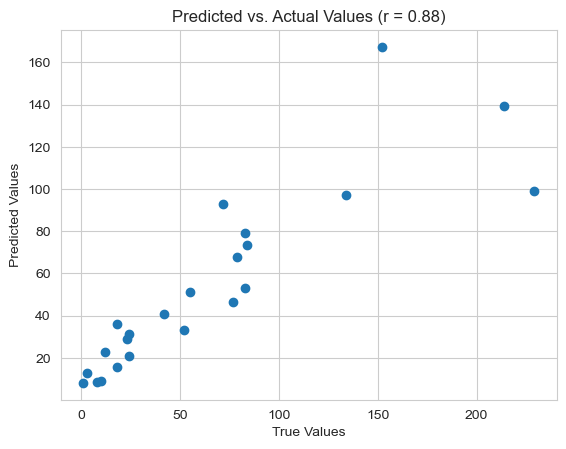

In [77]:
# Plotting the correlation of predicted and actual values in a scatterplot.

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

In [85]:
metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

In [88]:
metrics_df

,Metric,Value
0,MAE,19.695
1,MSE,1200.965
2,RMSE,34.655
3,R-Squared,0.727


#### We can conclude that our model is 72,7 % accurate.

#### Multiple Regression

In [90]:
# Shuffling the data 
df_shuffled = shuffle(df, random_state=42)

# Creating the Y and X values
DV = '# Killed'
X = df_shuffled[['# Injured', 'State']]  
y = df_shuffled[DV]

# Our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Creating an instance of LinearRegression
model = LinearRegression()

# Training our model with the given values
model.fit(X_train, y_train)

# Print model coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
feature_names = X.columns
equation = ' + '.join(f'({coef:0.2f} x {name})' for coef, name in zip(model.coef_, feature_names))
print(f'Killed = {model.intercept_:0.2f} + {equation}')

# Testing our model with real values
predictions = model.predict(X_test)

Intercept: 0.4945323379924229
Coefficients: [0.12057542 0.00250672]
Killed = 0.49 + (0.12 x # Injured) + (0.00 x State)


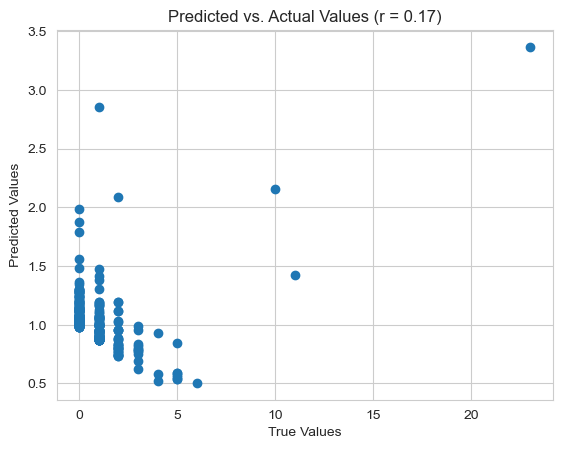

In [92]:
# Plotting the correlation of predicted and actual values in a scatterplot

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, predictions)[0]))
plt.show()

In [94]:
metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, predictions),
                                    metrics.mean_squared_error(y_test, predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, predictions)),
                                    metrics.explained_variance_score(y_test, predictions)]}).round(3)

In [96]:
metrics_df

,Metric,Value
0,MAE,1.068
1,MSE,3.417
2,RMSE,1.849
3,R-Squared,0.029


In [19]:
#### We can conclude that our model is 2,9 % accurate.

#### Polynominal Regression

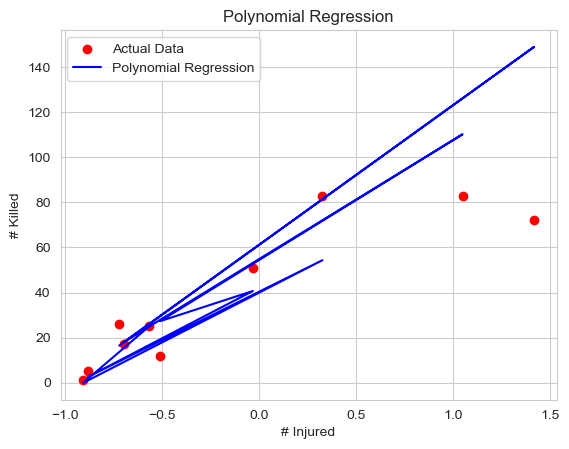

In [99]:
# Shuffling the data 
df_shuffled = shuffle(df_grouped, random_state=42)

# Creating the Y and X values
DV = '# Killed'
X = df_shuffled[['# Injured']]  
y = df_shuffled[DV]  

# Our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the Polynomial Regression model
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)

# Prediction
y_predict = pol_reg.predict(X_test_poly)

# Plotting Function
def viz_polynomial():
    plt.scatter(X_test, y_test, color='red', label='Actual Data')
    plt.plot(X_test, y_predict, color='blue', label='Polynomial Regression')
    plt.title('Polynomial Regression')
    plt.xlabel('# Injured')
    plt.ylabel('# Killed')
    plt.legend()
    plt.show()

# Calculating metrics
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r_squared = metrics.r2_score(y_test, y_predict)

# Creating metrics DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],
    'Value': [mae, mse, rmse, r_squared]
}).round(3)

# Show the function
viz_polynomial()

In [101]:
metrics_df

,Metric,Value
0,MAE,17.266
1,MSE,792.651
2,RMSE,28.154
3,R-Squared,0.144


#### We can conclude that our model is 14,4 % accurate, and that this graph is irrelevant. Therefore we cannot use it.